# Investigating Fandango Movie Ratings
In October 2015, a data journalist named Walt Hickey analyzed Fandango's aggregated movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest. He published his analysis in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism worth reading.


In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system since Hickey's analysis.

## Data
One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time:

Walt Hickey made the data he analyzed publicly available on GitHub which can be found [here](https://github.com/fivethirtyeight/data/tree/master/fandango).

- **FILM**	The film in question
- **RottenTomatoes**	The Rotten Tomatoes Tomatometer score for the film
- **RottenTomatoes_User**	The Rotten Tomatoes user score for the film
- **Metacritic**	The Metacritic critic score for the film
- **Metacritic_User**	The Metacritic user score for the film
- **IMDB**	The IMDb user score for the film
- **Fandango_Stars**	The number of stars the film had on its Fandango movie page
- **Fandango_Ratingvalue**	The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
- **RT_norm**	The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system
- **RT_user_norm**	The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system
- **Metacritic_norm**	The Metacritic critic score for the film, normalized to a 0 to 5 point system
- **Metacritic_user_nom**	The Metacritic user score for the film, normalized to a 0 to 5 point system
- **IMDB_norm**	The IMDb user score for the film, normalized to a 0 to 5 point system
- **RT_norm_round**	The Rotten Tomatoes Tomatometer score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
- **RT_user_norm_round**	The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
- **Metacritic_norm_round**	The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
- **Metacritic_user_norm_round**	The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
- **IMDB_norm_round**	The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
- **Metacritic_user_vote_count**	The number of user votes the film had on Metacritic
- **IMDB_user_vote_count**	The number of user votes the film had on IMDb
- **Fandango_votes**	The number of user votes the film had on Fandango
- **Fandango_Difference**	The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue


Dataquest collected movie ratings data for movies released in 2016 and 2017, after Hickey's analysis, and published it on Github [here](https://github.com/mircealex/Movie_ratings_2016_17).

- **movie**	the name of the movie
- **year**	the release year of the movie
- **metascore**	the Metacritic rating of the movie (the "metascore" - critic score)
- **imdb**	the IMDB rating of the movie (user score)
- **tmeter**	the Rotten Tomatoes rating of the movie (the "tomatometer" - critic score)
- **audience**	the Rotten Tomatoes rating of the movie (user score)
- **fandango**	the Fandango rating of the movie (user score)
- **n_metascore**	the metascore normalized to a 0-5 scale
- **n_imdb**	the IMDB rating normalized to a 0-5 scale
- **n_tmeter**	the tomatometer normalized to a 0-5 scale
- **n_audience**	the Rotten Tomatoes user score normalized to a 0-5 scale
- **nr_metascore**	the metascore normalized to a 0-5 scale and rounded to the nearest 0.5
- **nr_imdb**	the IMDB rating normalized to a 0-5 scale and rounded to the nearest 0.5
- **nr_tmeter**	the tomatometer normalized to a 0-5 scale and rounded to the nearest 0.5
- **nr_audience**	the Rotten Tomatoes user score normalized to a 0-5 scale and rounded to the nearest 0.5

We'll use both of these datasets to analyze the rating system's characteristics before and after Hickey's analysis.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
fandango_before = pd.read_csv('fandango_score_comparison.csv')
fandango_before.head(5)

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
fandango_after = pd.read_csv('movie_ratings_16_17.csv')
fandango_after.head(5)

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


We're only interested in the Fandango data, so we'll keep only the columns relevant to Fandango ratings

In [4]:
fandango_before = fandango_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']]
fandango_after = fandango_after[['movie', 'year', 'fandango']]

Reading the documentation for the datasets, we can see that the samples are not chosen randomly but rather selected based on popularity. This is known as purposive sampling and unfortunately makes it difficult for us to compare the two sets of data statistically since samples could have been selected very differently for each.

## Changing the Goal
Since the samples are unlikely to be representative of the population we are interested in describing, we'll have to either find new data or change our goal. 

Since we're unlikely to find data that perfectly fits our needs, let's try instead to compare the ratings for popular movies between the two time periods and see if anything has changed. This could even serve as a proxy for our original question.


## Fandango Ratings of Popular Movies
First let's make sure that our samples are of popular movies, that is using Fandango's definition of movies with over 30 fan ratings on the Fandango website. 

In [5]:
(fandango_before['Fandango_votes'] < 30).sum()

0

Doing this on the 2016-2017 dataset is a little tougher since there isn't a column counting the number of fan reviews on Fandango, so instead let's take a random sample and make sure that most of the movies in that sample have greater than 30 votes.

In [6]:
fandango_before.sample(10, random_state=1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


Looking at the Fandango website in May 2019, all of these movies except Cell (18 reviews) has over 30 fan reviews, which gives us enough confidence to say that this dataset is also representative of popular films.

Now let's isolate the movies released in 2015 and 2016 into two separate data sets.

In [7]:
fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]
fandango_2015 = fandango_before[fandango_before['Year'] == '2015']
fandango_2015.head(3)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,Year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015


In [8]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016]
fandango_2016.head(3)

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0


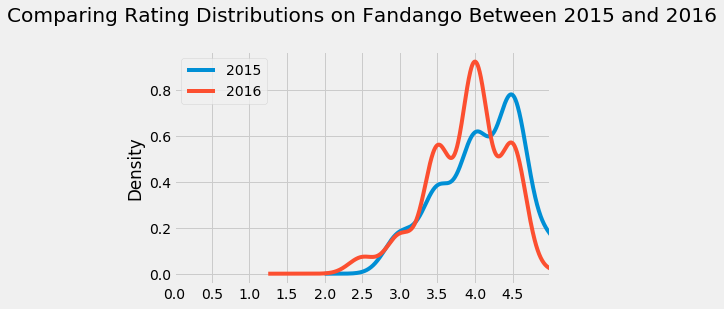

In [22]:
plt.style.use('fivethirtyeight')

fandango_2015['Fandango_Stars'].plot.kde(label='2015')
fandango_2016['fandango'].plot.kde(label='2016')
plt.title('Comparing Rating Distributions on Fandango Between 2015 and 2016', y=1.1)
plt.legend(loc='upper left')
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5, .5))
plt.show()

Both distributions are strongly left skewed, but the 2016 distribution is clearly shifted to the left indicating lower ratings than in 2015. This suggests that there in fact was a difference in Fandango's rating for popular movies between th